<h1>
    Equivalente Electrico del Calor
</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import os

In [2]:
os.environ['PATH'] += os.pathsep + r'C:\Users\futr_\AppData\Local\Programs\MiKTeX\miktex\bin\x64\latex.exe'

In [4]:
base_dir = Path.cwd().parent  # Subir un nivel desde el notebook
raw_dir = base_dir / "data-lab" / "raw"
file = 'LFC-3_Equivalente electrico-calor.xlsx'

In [7]:
plt.rcParams.update({
    "text.usetex": True,           # Activar LaTeX para textos
    "font.family": "serif",        # Tipo de fuente serif
    "font.serif": ["Computer Modern Roman"],  # Fuente estándar de LaTeX
    "font.size": 12
})

In [5]:
pd.read_excel(raw_dir/file,sheet_name='Generales',header =None,names=['Dato','Valor','Unidad'])

,Dato,Valor,Unidad
0,Masa Calorimetro_1,385.7,g
1,Masa Calorimetro_2,398.7,g
2,Masa Calorimetro_3,409.3,g
3,Masa Calorimetro + 150ml,531.2,g
4,Masa Calorimetro + 200ml,606.7,g
5,Masa Vaso 600ml,215,g
6,Masa Vaso 600ml + 150 ml,360.6,g
7,Masa Vaso 600ml + 200 ml,415.1,g
8,Temp Agua (calentada),88.2,C
9,Temp Agua (ambiente),19.8,C


### Masas

In [6]:
# Masa Calorimetro
masa_calorimetro_1 = 385.7	
masa_calorimetro_2 = 398.7	
masa_calorimetro_3 = 409.3	
masa_calorimetro = np.mean([masa_calorimetro_1,masa_calorimetro_2,masa_calorimetro_3])	
masa_calorimetro_agua_150ml = 531.2
masa_calorimetro_agua_200ml = 606.7
# Masa Vaso
masa_vaso = 215	
masa_vaso_agua_150ml = 360.6
masa_vaso_agua_200ml = 415.1
# Masa Agua 150 ml
masa_agua_150ml_1 = masa_calorimetro_agua_150ml - masa_calorimetro_1 # Medidos juntos
masa_agua_150ml_2 = masa_vaso_agua_150ml - masa_vaso
masa_agua_150ml = np.mean([masa_agua_150ml_1, masa_agua_150ml_2])

# Masa Agua 200 ml
masa_agua_200ml_1 = masa_calorimetro_agua_200ml - masa_calorimetro
masa_agua_200ml_2 = masa_vaso_agua_200ml - masa_vaso
masa_agua_200ml_3 = 196.77
masa_agua_200ml = np.mean([masa_agua_200ml_1, masa_agua_200ml_2, masa_agua_200ml_3])

# Masa aditivos
masa_ad_azucar = 30 
masa_ad_arroz = 40 
masa_ad_colorante = 1.8 - 0.5

### Temperatura

In [421]:
temp_agua_cal = 88.2	
temp_agua_amb = 19.8

### Series de Datos

In [8]:
calorimetro = pd.read_excel(raw_dir/file,sheet_name='Calorimetro')
corriente = pd.read_excel(raw_dir/file,sheet_name='Corriente')
agua = pd.read_excel(raw_dir/file,sheet_name='Agua')
arroz = pd.read_excel(raw_dir/file,sheet_name='Arroz')
azucar = pd.read_excel(raw_dir/file,sheet_name='Azucar')
colorante = pd.read_excel(raw_dir/file,sheet_name='Colorante')

# Parte I, Determinacion Cp Calorimetro

$$
Q_{cedido} = Q_{absorbido}
$$

$$
m_a c_a\left(T_{\text {caliente }}-T_{\text {eq }}\right)=m_a c_a\left(T_{\text {eq }}-T_{\text {ini }}\right)+m_c c_c\left(T_{\text {eq }}-T_{\text {ini }}\right)
$$

$$
\frac{m_a c_a\left(T_{\mathrm{caliente}}-T_{\mathrm{eq}}\right)}{T_{\mathrm{eq}}-T_{\mathrm{ini}}}=m_a c_a+m_c c_c
$$

$$
\frac{m_a c_a\left(T_{\mathrm{caliente}}-T_{\mathrm{eq}}\right)}{T_{\mathrm{eq}}-T_{\mathrm{ini}}}-m_a c_a=m_c c_c
$$

$$
c_c=\frac{m_a c_a}{m_c}\left(\frac{T_{\mathrm{caliente}}-T_{\mathrm{eq}}}{T_{\mathrm{eq}}-T_{\text {ini }}}-1\right)
$$


In [418]:
coef_eq_calorimetro = np.polyfit(calorimetro.Tiempo, calorimetro.Temp, 2)
equilb_termico = np.poly1d(coef_eq_calorimetro)
tiempo_eq_cal = np.linspace(min(calorimetro.Tiempo), 3000, 100)
temp_eq_cal = equilb_termico(tiempo_eq_cal)

## Extrapolacion tiempo de equilibrio termico

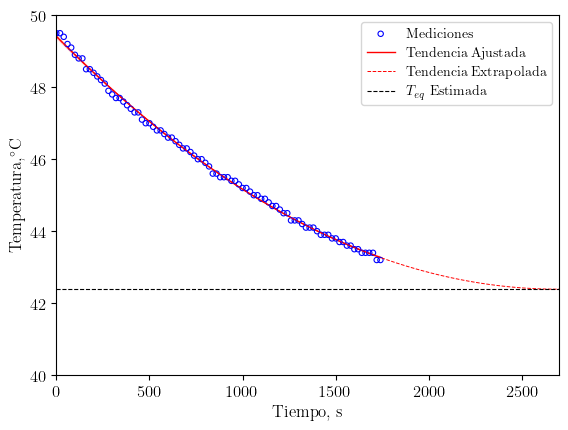

In [420]:
tiempo_eq_final = tiempo_eq_cal[np.argmin(temp_eq_cal)]
temp_eq_final = min(temp_eq_cal)

fig, ax = plt.subplots()
ax.scatter(calorimetro.Tiempo,calorimetro.Temp,lw=0.8,color='blue',zorder=2,s=15,facecolors='none',label='Mediciones')
sns.regplot(x=calorimetro.Tiempo, y=calorimetro.Temp,order=2,scatter=False, line_kws={"color": "red", "lw": 1, "alpha":1,"zorder":1},label='Tendencia Ajustada',ax=ax)
ax.plot(tiempo_eq_cal, temp_eq_cal,color='red',lw=0.7,ls='--',label='Tendencia Extrapolada')
ax.hlines(y=temp_eq_final,xmin= 0, xmax=tiempo_eq_final,color='black',lw=0.8,ls='--',label='$T_{eq}$ Estimada')  

ax.set_xlabel('Tiempo, s')
ax.set_ylabel('Temperatura,$^{\\circ}$C')

ax.set_xlim(0,x_line[np.argmin(y_line)])
ax.set_ylim(40,50)

plt.legend(fontsize=10)  
plt.subplots_adjust(left=0.115, right=0.9, bottom=0.15, top=0.9)
plt.savefig('Mediciones_Calorimetro.pdf', pad_inches=0.06)
plt.show()

$$
c_c=\frac{m_a c_a}{m_c}\left(\frac{T_{\mathrm{caliente}}-T_{\mathrm{eq}}}{T_{\mathrm{eq}}-T_{\text {ini }}}-1\right)
$$


In [426]:
# cp_agua = 1 # cal/g C
cp_agua = 4.1816 # J/g C

cp_cal = masa_agua_150ml * cp_agua/masa_calorimetro * (((temp_agua_cal - temp_eq_final) / (temp_eq_final - temp_agua_amb))-1)
cp_cal

np.float64(1.5724252192471733)

# Parte II, Determinacion del equivalente electrico del calor

## Datos medidos en cada escenario

In [30]:
temp_min = np.min([agua.Temp.min(),
arroz.Temp.min(),
azucar.Temp.min(),
colorante.Temp.min()])

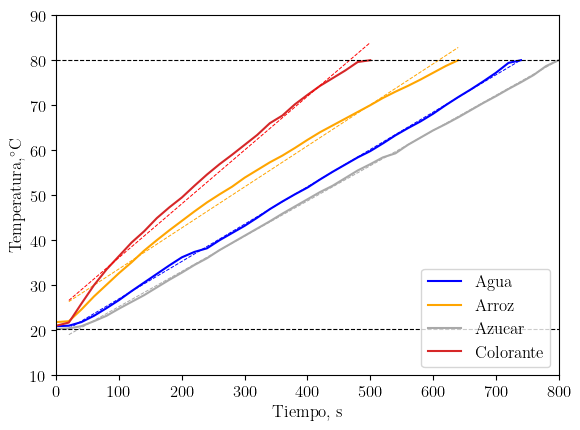

In [58]:
offset = 1
plt.plot(agua.Tiempo,agua.Temp,label='Agua',color='blue')
sns.regplot(x=agua.Tiempo[offset:], y=agua.Temp[offset:],ci=False,order=1,scatter=False, line_kws={"color": "blue","ls":'--', "lw": 0.7, "alpha":1})
plt.plot(arroz.Tiempo,arroz.Temp,label='Arroz',color='orange')
sns.regplot(x=arroz.Tiempo[offset:], y=arroz.Temp[offset:],ci=False,order=1,scatter=False, line_kws={"color": "orange","ls":'--', "lw": 0.7, "alpha":1})
plt.plot(azucar.Tiempo,azucar.Temp,label='Azucar',color='darkgray')
sns.regplot(x=azucar.Tiempo[offset:], y=azucar.Temp[offset:],ci=False,order=1,scatter=False, line_kws={"color": "darkgray","ls":'--', "lw": 0.7, "alpha":1})
plt.plot(colorante.Tiempo,colorante.Temp,label='Colorante')
sns.regplot(x=colorante.Tiempo[offset:], y=colorante.Temp[offset:],ci=False,order=1,scatter=False, line_kws={"color": "red","ls":'--', "lw": 0.7, "alpha":1})

plt.hlines(y=temp_min,xmin= 0, xmax=900,color='black',lw=0.8,ls='--')  
plt.hlines(y=80,xmin= 0, xmax=900,color='black',lw=0.8,ls='--')  

plt.xlabel('Tiempo, s')
plt.ylabel('Temperatura,$^{\\circ}$C')

plt.ylim(10,90)
plt.xlim(0,800)

plt.legend(loc='lower right')
plt.subplots_adjust(left=0.115, right=0.9, bottom=0.15, top=0.9)
plt.savefig('CasosExperimento.pdf', pad_inches=0.06)
plt.show()

$$
dU = \delta W_{electrico} - \delta Q
$$

como $dU=0$, $\Rightarrow$
$$\delta W_{electrico} = \delta Q$$
$$\frac{\delta W_{\text{eléctrico}}}{\delta Q} = 1 \left[\frac{J}{J}\right] = 
\underbrace{4.18 \left[\frac{J}{\text{cal}}\right]}_{\text{Se conoce como } J}$$

$$J = \frac{\delta W_{electrico}}{\delta Q} $$

$$
J = \frac{V \cdot I \cdot t}{mc_p \Delta T} \Rightarrow \Delta T = \frac{V \cdot I \cdot t}{mc_p \  J} 
$$

$$
\Rightarrow  (T - T_0) = \frac{V \cdot I \cdot t}{mc_p \  J}
$$


$$
T({\color{red}{t}}) = \frac{V\cdot I }{\left(\sum{m_i\cdot c_{p_i}} \right) \ J} \ {\color{red}{t}} + T_0
$$

donde $
\sum{m_i\cdot c_i} = (m_w + m_x) \cdot c_x + m_c \cdot c_c  
$

$$
T({\color{red}{t}}) = {\color{blue}{\beta}} \ {\color{red}{t}} + T_0
$$

$$
{\color{blue}{\beta}} = \frac{V\cdot I }{\left(\sum{m_i\cdot c_i} \right) J} 
$$

$$
J = \frac{V\cdot I }{\left(\sum{m_i\cdot c_i} \right) {\color{blue}{\beta}}} 
$$





$\beta$ seria el gradiente de temperatura con respecto del tiempo, el cual es particular de cada set de datos
$$
\beta =\frac{V \cdot A}{(g \cdot \frac{J}{g\   ^{\circ}C})}= \frac{W}{(g \cdot \frac{J}{g\   ^{\circ}C})}= \frac{J/s}{(g \cdot \frac{J}{g\   ^{\circ}C})} = \left[\frac{^{\circ}C}{s}\right]
$$

In [67]:
def calcular_pendientes_y_R2(pares):
    pendientes = []
    valores_R2 = []
    for X, Y in pares:
        coef = np.polyfit(X, Y, 1)
        pendiente = coef[0]
        R = np.corrcoef(X, Y)[0, 1]
        R2 = R ** 2
        pendientes.append(pendiente)
        valores_R2.append(R2)

    return pendientes, valores_R2

In [502]:
pares_datos = [
    [agua.Tiempo, agua.Temp],
    [azucar.Tiempo, azucar.Temp],
    [arroz.Tiempo, arroz.Temp],
    [colorante.Tiempo, colorante.Temp]
]

etiquetas = ['Agua', 'Azucar', 'Arroz', 'Colorante']
pendientes, valores_R2 = calcular_pendientes_y_R2(pares_datos)
resultados = pd.DataFrame({
    'Experimento': etiquetas,
    'Pendiente': pendientes,
    'R2': valores_R2
})
resultados.set_index('Experimento', inplace=True)

In [503]:
print(resultados)

             Pendiente        R2
Experimento                     
Agua          0.082461  0.999218
Azucar        0.077725  0.999085
Arroz         0.091822  0.989213
Colorante     0.120769  0.989569


Todos los valores $J$, para cada experimento deben ser iguales, ya que expresa que el trabajo electrico se transfirio al agua como Calor, manifestandose en un aumento de temperatura. Aunque $\beta$ viene del ajuste de los datos medidos, y las masas tambien se tienen, las mediciones de Voltaje y Corriente, presentan valores incongruentes de Potencia electrica ademas que las capacidades calorificas para las sustancias, son en general desconocidas. Estas ultimas tendrian que haberse calculado por un experimento independiente a traves de aplicar la le de mezclas. 

Es decir que se desconocen los valores de $V$, $I$ y $c_{p_{x}}$

$$
J = \frac{ {\color{red}{V\cdot I}} }{\left( (m_w + m_x) \cdot {\color{red}{c_x}} + m_c \cdot c_c   \right) \beta}
$$


### Para las sustancias con $C_x$ conocido

$$
J_{1} \beta_{1} \left(\sum{m_{i} c_{i}}\right)_{1} =
J_{2} \beta_{2} \left(\sum{m_{i} c_{i}}\right)_{2} 
$$

$$
J_{1}  =
J_{2} \frac{\beta_{2} \left(\sum{m_{i} c_{i}}\right)_{2}}{\beta_{1} \left(\sum{m_{i} c_{i}}\right)_{1}}
$$

Aunque no podamos definir $J$ de forma explicita para cada experimento, podemos evaluar el cociente 

$$
\frac{\beta_{2} \left(\sum{m_{i} c_{i}}\right)_{2}}{\beta_{1} \left(\sum{m_{i} c_{i}}\right)_{1}} \approx 1
$$

Con lo que se podra concluir independientemente del valor de J, si los experimentos tienen el mismo valor. Sin embargo para esto se requiere conocer el $C_{p{x}}$ de la mezcla, para el caso del azucar, esta puede tomarse de la literatura, con base en su concentracion. 

In [504]:
resultados= resultados.assign(Concentracion=100*np.array([0, masa_ad_azucar, np.nan, masa_ad_colorante])/(np.array([0, masa_ad_azucar, np.nan, masa_ad_colorante]) + masa_agua_200ml))
print(resultados)

             Pendiente        R2  Concentracion
Experimento                                    
Agua          0.082461  0.999218       0.000000
Azucar        0.077725  0.999085      12.937168
Arroz         0.091822  0.989213            NaN
Colorante     0.120769  0.989569       0.639795


In [505]:
h2o_azucar_concentracion = [0, 10, 20, 30, 40, 50, 60]
h2o_azucar_cp = np.array([4187, 4120, 3864, 3626, 3358, 3256, 2939])/1000
cp_azucar = np.interp(resultados.loc['Azucar'].Concentracion, h2o_azucar_concentracion, h2o_azucar_cp)

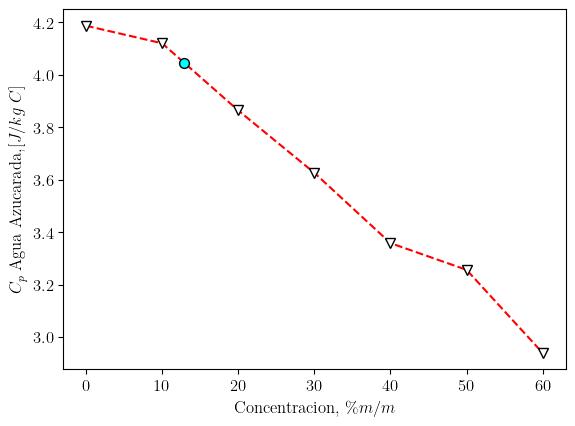

In [547]:
plt.plot(h2o_azucar_concentracion, h2o_azucar_cp, marker='v',color='red',mec='black',mfc='white',ms=7,ls='--')
plt.scatter([resultados.loc['Azucar'].Concentracion],[cp_azucar],s=50,c='cyan',edgecolor='black',zorder=2)
plt.xlabel('Concentracion, $\\%  m/ m$')
plt.ylabel('$C_p$  Agua Azucarada,$[J/kg \\ C]$')
plt.subplots_adjust(left=0.115, right=0.9, bottom=0.15, top=0.9)
plt.savefig('AguaAzucarada.pdf', pad_inches=0.06)
plt.show()
# cp_azucar/= 1000

In [548]:
cp_azucar

np.float64(4.044808486782526)

In [507]:
βmc_2 = resultados.loc['Azucar'].Pendiente*(masa_calorimetro*cp_cal + (masa_agua_200ml + masa_ad_azucar)*cp_azucar)
βmc_1 = resultados.loc['Agua'].Pendiente*(masa_calorimetro*cp_cal + masa_agua_200ml*cp_agua)

In [508]:
βmc_cociente = βmc_2/βmc_1
print(βmc_cociente)

1.0026674982270143


In [509]:
print(f'El error del cociente es {round(100*abs(βmc_cociente-1)/1,3)}%')

El error del cociente es 0.267%


### Para las sustancias con $C_x$ desconocido

En este caso tendremos que hacer uso directamente del equivalente entre $W_e$ y $Q$ para poder despejar el $C_p$ desconocido

$$
c_{p_{2}} \approx   \frac{\beta_{1} \left(m_{1} \cdot c_{1} + m_{c} \cdot c_{c} \right)}{\beta_{2} \left(m_{1} + m_{2}\right)} - \frac{m_{c} \cdot c_{c}}{\left(m_{1} + m_{2}\right)} 
$$

In [510]:
def cp2(m2, β2):
    """
    Compara con el caso del agua, si fuera con otro caso, habria que separar igual el m1 del agua
    """
    β1 = resultados.loc['Agua'].Pendiente
    cp1 = cp_agua
    return (β1*(masa_agua_200ml*cp1 + masa_calorimetro*cp_cal))/(β2*(masa_agua_200ml+m2)) - (masa_calorimetro*cp_cal)/(masa_agua_200ml + m2)

In [511]:
cp = []
cp.append(cp_agua)
cp.append(cp_azucar)
cp.append(cp2(masa_ad_arroz, resultados.loc['Arroz'].Pendiente))
cp.append(cp2(masa_ad_colorante, resultados.loc['Colorante'].Pendiente))
cp = np.array(cp)
cp

array([4.1816    , 4.04480849, 2.87063051, 1.86017759])

In [512]:
resultados= resultados.assign(Cp=cp)
print(resultados)

             Pendiente        R2  Concentracion        Cp
Experimento                                              
Agua          0.082461  0.999218       0.000000  4.181600
Azucar        0.077725  0.999085      12.937168  4.044808
Arroz         0.091822  0.989213            NaN  2.870631
Colorante     0.120769  0.989569       0.639795  1.860178


### Supongamos un valor de V

$$
I = \frac{P}{V} = \frac{[W]}{[V]} = [A]
$$


$$
P = \frac{V^2}{R} = \frac{[V^2]}{[\Omega]} = [W]
$$

$$
J = \frac{V\cdot (V /R) }{\left(\sum{m_i\cdot c_i} \right) \beta} 
$$


$$
J = \frac{1}{R \left(\sum{m_i\cdot c_i} \right)\beta} \cdot {\color{red}{V}^2 }
$$


In [541]:
voltaje = 20 # V
resistencias = np.array([1, 2, 3])
escenarios_resistencia = pd.DataFrame(zip([voltaje]*3,resistencias,voltaje**2 / resistencias ), columns =['Voltaje','Resistencia','Potencia'])
print(escenarios_resistencia)

   Voltaje  Resistencia    Potencia
0       20            1  400.000000
1       20            2  200.000000
2       20            3  133.333333


In [534]:
masa_ads = [0, masa_ad_azucar, masa_ad_arroz, masa_ad_colorante] 

for exp, masa_ad, cpi in zip(etiquetas, masa_ads, cp):

    sum_mc = (masa_agua_200ml + masa_ad) * cpi + masa_calorimetro * cp_cal
    beta = resultados.loc[exp, 'Pendiente']
    J_den = sum_mc * beta

    for res in resistencias:
        corriente = voltaje/res # A
        potencia_electrica = voltaje * corriente
        J_num = potencia_electrica
        J_value = J_num / J_den
        resultados.loc[exp, f'J_Ω{res}'] = J_value
        resultados.loc[exp, f'J_Ω{res}_err_prc'] = 100*abs(J_value-1)/1

In [543]:
resultados

,Pendiente,R2,Concentracion,Cp,J_Ω1,J_Ω1_err_prc,J_Ω2,J_Ω2_err_prc,J_Ω3,J_Ω3_err_prc
Experimento,,,,,,,,,,
Agua,0.082461,0.999218,0.000000,4.181600,3.300098,230.009788,1.650049,65.004894,1.100033,10.003263
Azucar,0.077725,0.999085,12.937168,4.044808,3.291318,229.131829,1.645659,64.565915,1.097106,9.710610
Arroz,0.091822,0.989213,NaN,2.870631,3.300098,230.009788,1.650049,65.004894,1.100033,10.003263
Colorante,0.120769,0.989569,0.639795,1.860178,3.300098,230.009788,1.650049,65.004894,1.100033,10.003263


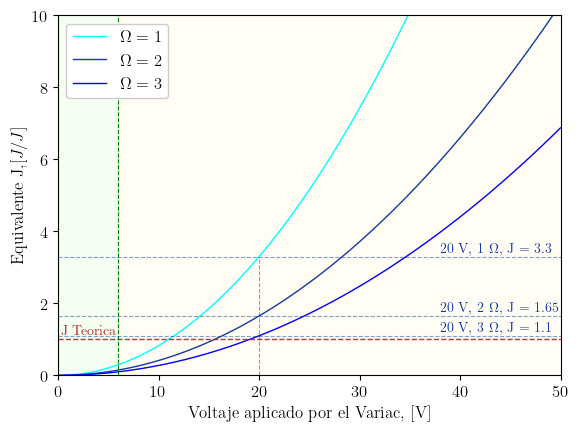

In [546]:
Σmc = masa_agua_200ml*cp_agua + masa_calorimetro * cp_cal
β = resultados.loc['Agua'].Pendiente
V = np.linspace(0, 50,100)
J_num = V**2
J_den = Σmc * β
J = J_num/J_den

# J_agua = resultados.loc['Agua'].J

plt.plot(V, J/1,color='cyan',lw=1,label='$$\\Omega = 1$$')
plt.plot(V, J/2,color='#143aa3',lw=1,label='$$\\Omega = 2$$')
plt.plot(V, J/3,color='blue',lw=1,label='$$\\Omega = 3$$')

# Potencia nominal usual de un calorimetro
plt.vlines(ymin=0,x= 6, ymax=10,lw=0.8,ls='--',color='green')   
# Potencia indicada por la practica
plt.vlines(ymin=0,x= voltaje, ymax=resultados.loc['Agua','J_Ω1'],lw=0.8,ls='--',color='#143aa3',alpha=0.5)  
plt.hlines(y=resultados.loc['Agua','J_Ω1'],xmin= 0, xmax=50,color='#143aa3',lw=0.8,ls='--',alpha=0.5) 
plt.hlines(y=resultados.loc['Agua','J_Ω2'],xmin= 0, xmax=50,color='#143aa3',lw=0.8,ls='--',alpha=0.5) 
plt.hlines(y=resultados.loc['Agua','J_Ω3'],xmin= 0, xmax=50,color='#143aa3',lw=0.8,ls='--',alpha=0.5) 
# Potencia ideal para tener 4.18
# plt.vlines(ymin=0,x= voltaje_ideal, ymax= 1,lw=1,ls='--',color='firebrick',alpha=0.3)  
plt.hlines(y=1,xmin= 0, xmax=50,lw=1,color='firebrick',ls='--',alpha=0.9)  

plt.axvspan(0, 6, color='#2bff00', alpha=0.05)
plt.axvspan(6, 50, color='#ffe987', alpha=0.09)
plt.text(0.3, 1 + 0.1, 'J Teorica',color='firebrick',fontsize=10)
# plt.text(7, 1 + 0.1, f'31.3 V,  2 $\\Omega$,  J = {1}',color='firebrick',size=10)

plt.text(38, resultados.loc['Agua','J_Ω1'] + 0.1, f'20 V,  1 $\\Omega$,  J = {round(resultados.loc['Agua','J_Ω1'],3)}',color='#143aa3',size=10)
plt.text(38, resultados.loc['Agua','J_Ω2'] + 0.1, f'20 V,  2 $\\Omega$,  J = {round(resultados.loc['Agua','J_Ω2'],3)}',color='#143aa3',size=10)
plt.text(38, resultados.loc['Agua','J_Ω3'] + 0.1, f'20 V,  3 $\\Omega$,  J = {round(resultados.loc['Agua','J_Ω3'],3)}',color='#143aa3',size=10)
plt.ylim(0,10)
plt.xlim(0,50)
plt.xlabel('Voltaje aplicado por el Variac, [V]')
plt.ylabel('Equivalente J,$[J/J]$')
plt.legend(loc='upper left', framealpha=1)
plt.subplots_adjust(left=0.115, right=0.9, bottom=0.15, top=0.9)
plt.savefig('J_wrt_V.pdf', pad_inches=0.06)
plt.show()

# Fin

$$
J_{agua} \approx J_{azucar}
$$

$$
J_{agua} = \frac{1}{\left(\sum{m_i\cdot c_i} \right)_{agua}\beta_{agua}} \cdot \frac{{\color{red}{V}^2 }}{R}
$$

$$
J_{azucar} = \frac{1}{\left(\sum{m_i\cdot c_i} \right)_{azucar}\beta_{azucar}} \cdot \frac{{\color{red}{V}^2 }}{R}
$$

$$
\frac{1}{\left(\sum{m_i\cdot c_i} \right)_{agua}\beta_{agua}} \approx \frac{1}{\left(\sum{m_i\cdot c_i} \right)_{azucar}\beta_{azucar}}
$$

---

In [22]:
def calcular_pendientes(pares):
    pendientes = []
    for par in pares:
        X, Y = par  
        coef = np.polyfit(X, Y, 1)
        pendientes.append(coef[0])
    return pendientes

In [122]:
# pares_datos = [
#     [agua.Tiempo,agua.Temp],
#     [arroz.Tiempo,arroz.Temp],
#     [azucar.Tiempo,azucar.Temp],
#     [colorante.Tiempo,colorante.Temp]
# ]
# etiquetas = ['Agua', 'Arroz', 'Azucar', 'Colorante']
# pendientes = calcular_pendientes(pares_datos)
# resultados = pd.DataFrame(zip(etiquetas,pendientes), columns=['Experimento','Pendiente'])
# resultados.set_index('Experimento',inplace=True)

In [96]:
Σmc = (masa_agua_200ml + masa_ad_arroz) * cw * (0.69) + (masa_calorimetro * cc)  
β = resultados.loc['Arroz'].Pendiente
J_den = Σmc * β
J = J_num/J_den
print(J)

4.532914058735754


In [182]:
mw = 150
cw = 1
mc = 400
cc = 0.2
m_arroz = 
m_azucar = 
m_colorante =
c_arroz = 0.5
c_azucar = 0.5
c_colorante = 0.5

resultados['mc'] = [mw*cw+ mc*cc, 
                    mw*cw+ mc*cc+ m_arroz*c_arroz,
                    mw*cw+ mc*cc+ m_azucar*c_azucar,
                    mw*cw+ mc*cc+ m_colorante*c_colorante]

NameError: name 'mw' is not defined